# 1. Get tweets from Twitter

In [1]:
import tweepy as tw
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
bearer_token = "AAAAAAAAAAAAAAAAAAAAAOORdwEAAAAAMntvq76TozrzZPuXmAo%2BL2zz0qM%3DWEYEwbKEtkbwTWIKK87wHOQix9CIaSBck8bvYwk3akEhxi4U4e"

In [3]:
client = tw.Client(bearer_token)

In [4]:
hashtag = '(#Biden OR #JoeBiden lang:en)'
query = tw.Paginator(client.search_recent_tweets, query=hashtag, tweet_fields=['text','created_at']).flatten(1000)
tweets = [{'Tweet': tweet.text, 'Timestamp': tweet.created_at} for tweet in query]
print(tweets)

[{'Tweet': "@Tg3web ma i tifosi di #zelensky a comando,\nsapete niente degli affari di hunter #biden\nguarda caso proprio in #ukraina?\n..e no,il cognome invece,non e' un caso.", 'Timestamp': datetime.datetime(2022, 11, 7, 19, 4, 6, tzinfo=datetime.timezone.utc)}, {'Tweet': 'RT @GaucheMafia: Ça sent le sapin... 😏🤣😂🤣\n👉#Obama et #Biden ont organisé samedi dernier un meeting commun à Philadelphie, obligés de masque…', 'Timestamp': datetime.datetime(2022, 11, 7, 19, 4, 5, tzinfo=datetime.timezone.utc)}, {'Tweet': 'RT @tampafreepress: Rep. Gaetz Wants Biden Admin To Explain How $1B Given To The Taliban Was Spent\n#gaetz #biden #taliban @mattgaetz @RepMa…', 'Timestamp': datetime.datetime(2022, 11, 7, 19, 4, 2, tzinfo=datetime.timezone.utc)}, {'Tweet': '#BlackRock #Agenda2030 #NOM #EWF #KlausSchwab #DavosAgenda #ONU #ClubBuidelberg\n#ClubdeRoma #Soros #OpenSociaty\n#BillGates #FundacionBillyMelindaGates #Biden #Obama #Clinton #FundacionClinton #Faucci #OMS #Tedros #conspiracy #ConspiracyTheo

In [5]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweet,Timestamp
0,"@Tg3web ma i tifosi di #zelensky a comando,\ns...",2022-11-07 19:04:06+00:00
1,RT @GaucheMafia: Ça sent le sapin... 😏🤣😂🤣\n👉#O...,2022-11-07 19:04:05+00:00
2,RT @tampafreepress: Rep. Gaetz Wants Biden Adm...,2022-11-07 19:04:02+00:00
3,#BlackRock #Agenda2030 #NOM #EWF #KlausSchwab ...,2022-11-07 19:04:02+00:00
4,RT @TobySolo2: November 3rd -- U.S. soldiers a...,2022-11-07 19:04:01+00:00


In [6]:
df.tail(10)

,Tweet,Timestamp
990,RT @_Thirunarayan1: Hear Jordan Klepper descri...,2022-11-07 17:56:23+00:00
991,RT @_Thirunarayan1: Analysis: Here's exactly h...,2022-11-07 17:56:23+00:00
992,RT @_Thirunarayan1: Former NBA champion is cha...,2022-11-07 17:56:22+00:00
993,RT @_Thirunarayan1: Ex-South Korean Leader To ...,2022-11-07 17:56:22+00:00
994,@POTUS You know who has hurt Seniors?\n\n#JoeB...,2022-11-07 17:56:18+00:00
995,RT @Tberg725: Biden 100% says “no new drilling...,2022-11-07 17:56:15+00:00
996,Content analysis:\nThis article scores 79/100....,2022-11-07 17:56:10+00:00
997,RT @tampafreepress: Rep. Gaetz Wants Biden Adm...,2022-11-07 17:56:07+00:00
998,Biden will have us all living like cavemen\n\n...,2022-11-07 17:56:02+00:00
999,👇#Midterm2022 #Midterms2022 #Midterms #Vote #G...,2022-11-07 17:55:59+00:00


In [7]:
df.shape

(1000, 2)

# 2. Preprocess

In [8]:
import nltk
from nltk.corpus import stopwords

from textblob import Word, TextBlob

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#Biden', '#JoeBiden']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ritikadhall/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ritikadhall/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ritikadhall/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
def preprocess_tweets(tweet, custom_stopwords):
    preprocessed_tweet = tweet
    preprocessed_tweet.replace('[^\w\s]', '')
    preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in stop_words)
    preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in custom_stopwords)
    preprocessed_tweet = " ".join(Word(word).lemmatize() for word in preprocessed_tweet.split())
    return(preprocessed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweet,Timestamp,Processed Tweet
0,"@Tg3web ma i tifosi di #zelensky a comando,\ns...",2022-11-07 19:04:06+00:00,"@Tg3web tifosi di #zelensky comando, sapete ni..."
1,RT @GaucheMafia: Ça sent le sapin... 😏🤣😂🤣\n👉#O...,2022-11-07 19:04:05+00:00,@GaucheMafia: Ça sent le sapin... 😏🤣😂🤣 👉#Obama...
2,RT @tampafreepress: Rep. Gaetz Wants Biden Adm...,2022-11-07 19:04:02+00:00,@tampafreepress: Rep. Gaetz Wants Biden Admin ...
3,#BlackRock #Agenda2030 #NOM #EWF #KlausSchwab ...,2022-11-07 19:04:02+00:00,#BlackRock #Agenda2030 #NOM #EWF #KlausSchwab ...
4,RT @TobySolo2: November 3rd -- U.S. soldiers a...,2022-11-07 19:04:01+00:00,@TobySolo2: November 3rd -- U.S. soldier falli...


# 3. Calculate sentiment

In [11]:
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [13]:
df.tail()

,Tweet,Timestamp,Processed Tweet,polarity,subjectivity
995,RT @Tberg725: Biden 100% says “no new drilling...,2022-11-07 17:56:15+00:00,@Tberg725: Biden 100% say “no new drilling” ad...,-0.068182,0.454545
996,Content analysis:\nThis article scores 79/100....,2022-11-07 17:56:10+00:00,Content analysis: This article score 79/100. T...,0.100000,0.400000
997,RT @tampafreepress: Rep. Gaetz Wants Biden Adm...,2022-11-07 17:56:07+00:00,@tampafreepress: Rep. Gaetz Wants Biden Admin ...,0.050000,0.100000
998,Biden will have us all living like cavemen\n\n...,2022-11-07 17:56:02+00:00,Biden u living like caveman @ckchumley attacke...,0.150000,0.950000
999,👇#Midterm2022 #Midterms2022 #Midterms #Vote #G...,2022-11-07 17:55:59+00:00,👇#Midterm2022 #Midterms2022 #Midterms #Vote #G...,0.000000,0.000000


In [20]:
display(df[['polarity', 'subjectivity']].agg([np.mean, np.max, np.min, np.median]))

,polarity,subjectivity
mean,0.018857,0.174175
amax,1.000000,1.000000
amin,-1.000000,0.000000
median,0.000000,0.000000


# 4. Visualise

In [21]:
biden = df[['Timestamp', 'polarity']]
biden = biden.sort_values(by='Timestamp', ascending=True)
biden['MA Polarity'] = biden.polarity.rolling(10, min_periods=3).mean()

In [22]:
biden.head()

,Timestamp,polarity,MA Polarity
999,2022-11-07 17:55:59+00:00,0.000000,NaN
998,2022-11-07 17:56:02+00:00,0.150000,NaN
997,2022-11-07 17:56:07+00:00,0.050000,0.066667
996,2022-11-07 17:56:10+00:00,0.100000,0.075000
995,2022-11-07 17:56:15+00:00,-0.068182,0.046364


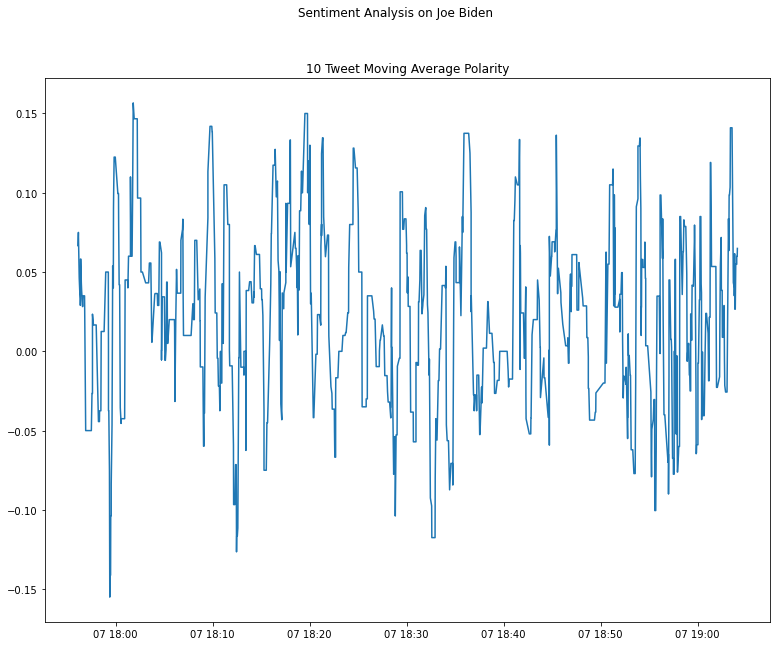

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(13, 10))

axes.plot(biden['Timestamp'], biden['MA Polarity'])
axes.set_title('\n'.join(['10 Tweet Moving Average Polarity']))

fig.suptitle('\n'.join(['Sentiment Analysis on Joe Biden']), y = 0.98)
plt.show()